In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-data-set-from-100-days-mlcampusx/data_science_job.csv


In [25]:
df = pd.read_csv('/kaggle/input/data-science-job-data-set-from-100-days-mlcampusx/data_science_job.csv')

In [26]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [27]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [28]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

### We can apply CCA only when Data is Missing Completely at Random and missing percentage in column < 5%
### based on above assumption, there are 5 columns we can perform CCA on

In [29]:
# finding out which all columns are having missing data less that 5%
columns = [col for col in df.columns if 0 < df[col].isnull().mean()*100 < 5 ]
columns

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [30]:
df.shape

(19158, 13)

In [31]:
len(df[['city_development_index','enrolled_university','education_level','experience','training_hours']].dropna()) / len(df) * 100

89.68577095730244

We will be left out with 89% of total data after performing CCA on these 5 columns, deleting can be done with pd.dropna() but before that copy org dataframe to other one so as to performe before and after CCA tasks

In [32]:
new_df = df.copy()

In [42]:
a = df[['city_development_index','enrolled_university','education_level','experience','training_hours']].dropna().index

Index([    0,     1,     2,     4,     5,     6,     7,     8,     9,    10,
       ...
       19147, 19148, 19149, 19151, 19152, 19153, 19154, 19155, 19156, 19157],
      dtype='int64', length=17182)

In [45]:
new_df = df.filter(items=a, axis=0)

In [46]:
new_df.shape

(17182, 13)

In [47]:
new_df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    22.541031
relevent_experience        0.000000
enrolled_university        0.000000
education_level            0.000000
major_discipline          12.530555
experience                 0.000000
company_size              29.786986
company_type              30.799674
training_hours             0.000000
target                     0.000000
dtype: float64

In [48]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

## Alternate way to drop missing values from desired columns 

In [51]:
#df.dropna(subset= ['city_development_index','enrolled_university','education_level','experience','training_hours'])

Now we will check the distribution of columns before and after performing CCA

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

For Numerical Columns we will draw Histograms and PDF and for Categorical columns we will draw hist and check percentage category wise to see the distribution before and after CCA 

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


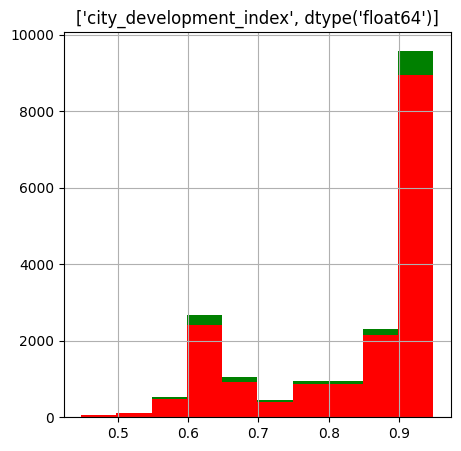

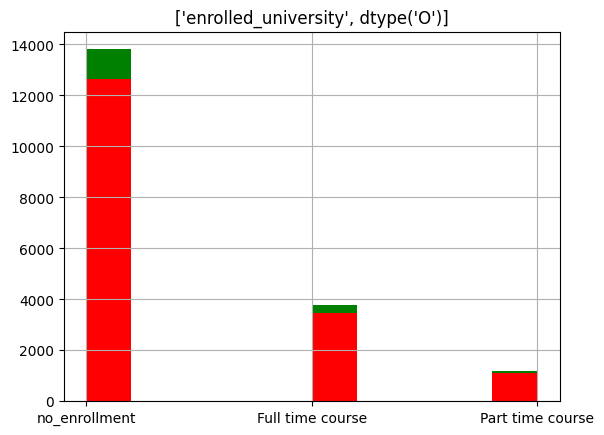

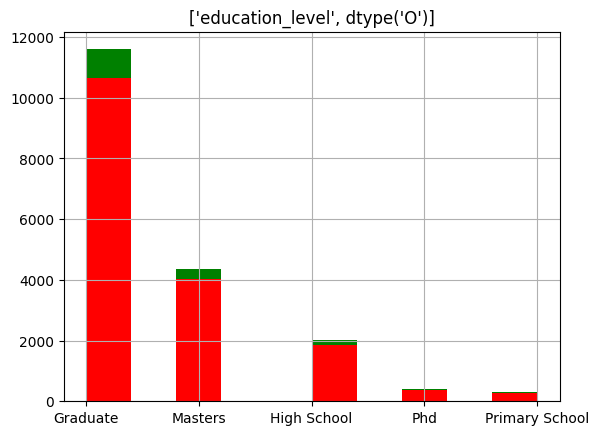

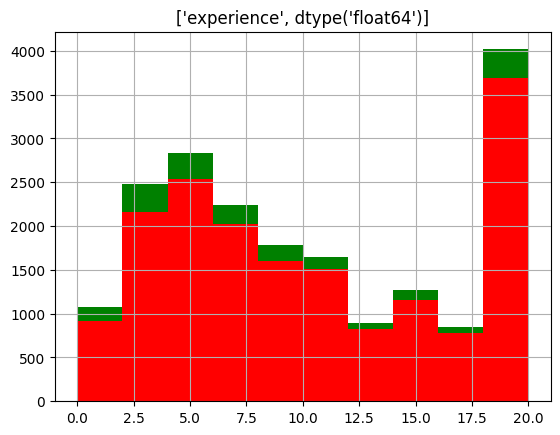

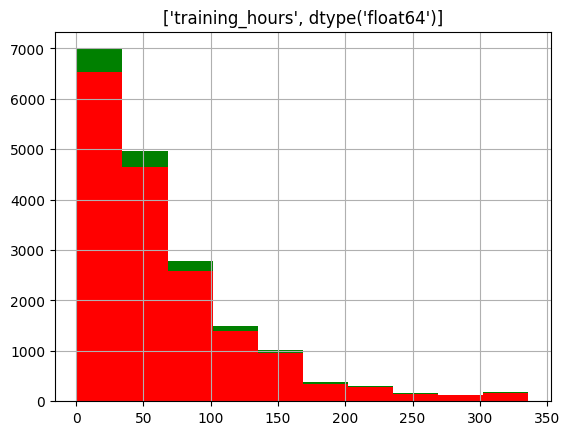

In [75]:
fig = plt.figure(figsize=(5,5))
for col in columns:
    fig.add_subplot(111)
    plt.title([col,df[col].dtype])
    df[col].hist(color='green')
    new_df[col].hist(color='red')
    plt.show()

In [66]:
for col in columns:
    print(df[col].dtype)

float64
object
object
float64
float64


In [73]:
import warnings
warnings.filterwarnings("ignore")

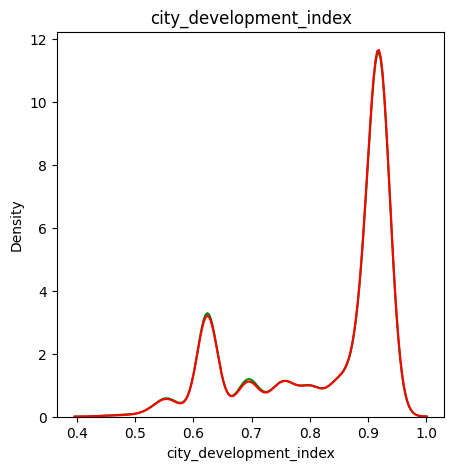

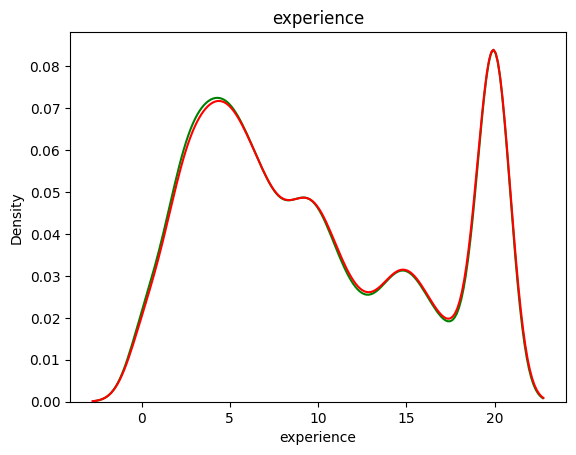

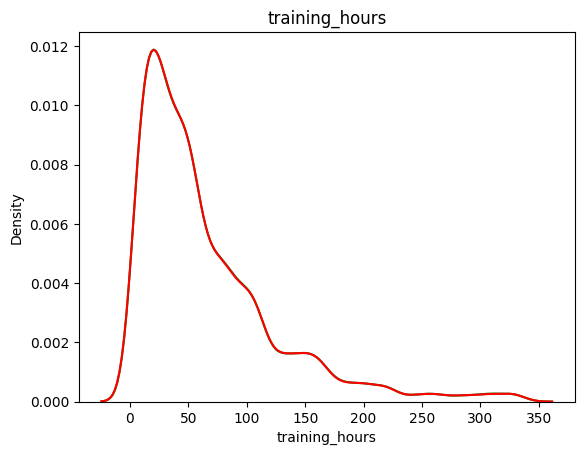

In [74]:
fig = plt.figure(figsize=(5,5))
for col in columns:
    if df[col].dtype == 'float64':
        fig.add_subplot(111)
        plt.title(col)
    
        sns.distplot(df[col],color='green', hist=False)
        sns.distplot(new_df[col],color='red', hist=False)
        plt.show()

In [86]:
for col in columns:
    if df[col].dtype == 'object':
        temp = pd.concat( [(df[col].value_counts() / len(df)) * 100 , (new_df[col].value_counts() / len(new_df)) * 100 ] , axis = 1)
        temp.columns = ['Before CCA' , 'After CCA']
        print(temp )
        print("\n")

                     Before CCA  After CCA
enrolled_university                       
no_enrollment         72.121307  73.518799
Full time course      19.610607  20.073333
Part time course       6.253262   6.407869


                 Before CCA  After CCA
education_level                       
Graduate          60.538678  61.983471
Masters           22.763336  23.408218
High School       10.528239  10.737982
Phd                2.160977   2.211617
Primary School     1.607683   1.658713


